# Creating a Filter, Edge Detection

### Edge Handling
Kernel convolution relies on centering a pixel and looking at it's surrounding neighbors. So, what do you do if there are no surrounding pixels like on an image corner or edge? Well, there are a number of ways to process the edges, which are listed below. It’s most common to use padding, cropping, or extension. In extension, the border pixels of an image are copied and extended far enough to result in a filtered image of the same size as the original image.

### Extend 
The nearest border pixels are conceptually extended as far as necessary to provide values for the convolution. Corner pixels are extended in 90° wedges. Other edge pixels are extended in lines.

### Padding 
The image is padded with a border of 0's, black pixels.

### Crop 
Any pixel in the output image which would require values from beyond the edge is skipped. This method can result in the output image being slightly smaller, with the edges having been cropped.

### Import resources and display image

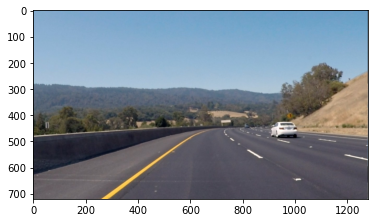

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
# image = mpimg.imread('images/city_hall.jpg')
image = mpimg.imread('images/curved_lane.jpg')
image_copy = np.copy(image)
plt.imshow(image_copy)

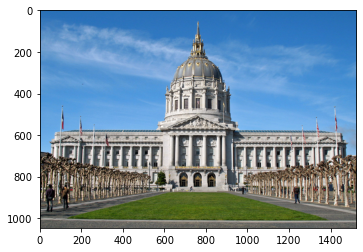

In [3]:
imageCV2 = cv2.imread('images/city_hall.jpg')
imageCV2 = cv2.cvtColor(imageCV2, cv2.COLOR_BGR2RGB)
plt.imshow(imageCV2)

### Convert the image to grayscale

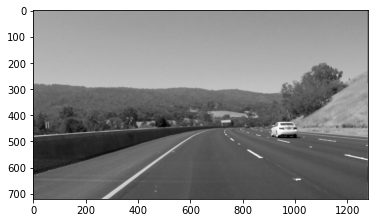

In [4]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

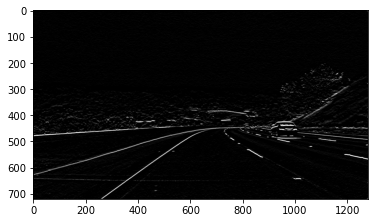

In [5]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
# bit-depth = -1: the output img will have the same type as the input img
filtered_image_3y = cv2.filter2D(gray, -1, sobel_y)
plt.imshow(filtered_image_3y, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



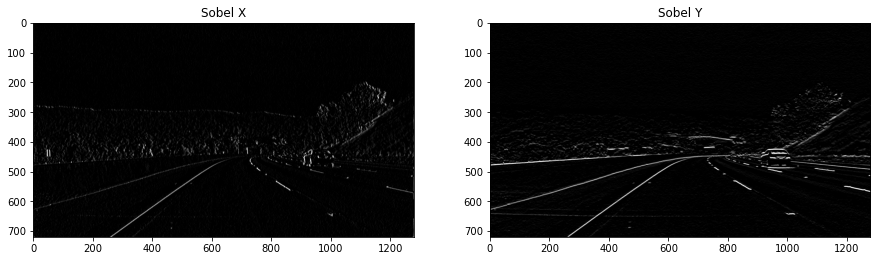

In [6]:
## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
# bit-depth = -1: the output img will have the same type as the input img
filtered_image_3x = cv2.filter2D(gray, -1, sobel_x)
#plt.imshow(filtered_image_3x, cmap='gray')

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1.set_title('Sobel X')
ax1.imshow(filtered_image_3x, cmap='gray')

ax2.set_title('Sobel Y')
ax2.imshow(filtered_image_3y, cmap='gray')

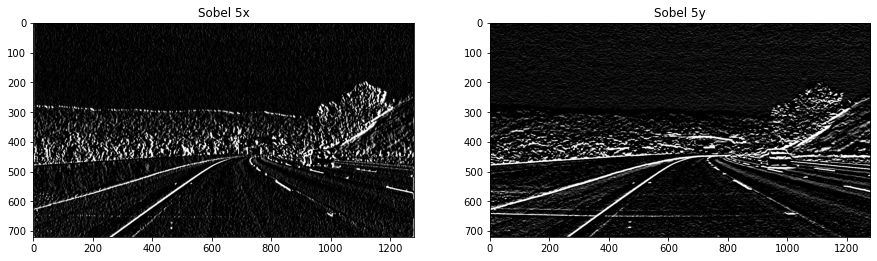

In [11]:
## TODO: Create and apply a 5*5 filter  
## TODO: Create and apply a Sobel x operator
sobel_5y = np.array([[ -1, -2, -5, -2, -1], 
                    [ -1, -2, -5, -2, -1], 
                   [ 0, 0, 0, 0, 0], 
                   [ 1, 2, 5, 2, 1],
                   [ 1, 2, 5, 2, 1]])

sobel_5x = np.array([[ -1, -1, 0, 1, 1], 
                    [ -2, -2, 0, 2, 2],
                   [ -5, -5, 0, 5, 5], 
                   [ -2, -2, 0, 2, 2],
                   [ -1, -1, 0, 1, 1]])

filtered_image_5x = cv2.filter2D(gray, -1, sobel_5x)
filtered_image_5y = cv2.filter2D(gray, -1, sobel_5y)

# plt.imshow(image_copy)
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1.set_title('Sobel 5x')
ax1.imshow(filtered_image_5x, cmap='gray')
ax2.set_title('Sobel 5y')
ax2.imshow(filtered_image_5y, cmap='gray')

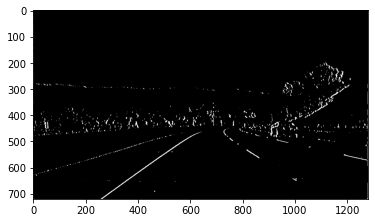

In [7]:
## TODO: Create a binary image
# Turn the image into a purely black and white image with the strongest edges clearly visable
retval, filtered_image_binary_50 = cv2.threshold(filtered_image_3x,50, 255, cv2.THRESH_BINARY) #too much noisy
retval, filtered_image_binary_100 = cv2.threshold(filtered_image_3x,100, 255, cv2.THRESH_BINARY)
retval, filtered_image_binary_200 = cv2.threshold(filtered_image_3x,200, 255, cv2.THRESH_BINARY) #too little info
plt.imshow(filtered_image_binary_50, cmap='gray')

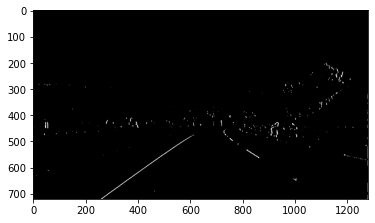

In [8]:
plt.imshow(filtered_image_binary_100, cmap='gray')

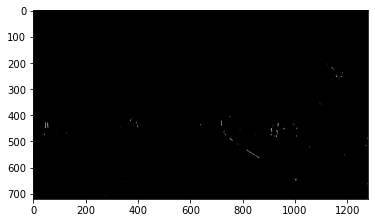

In [9]:
plt.imshow(filtered_image_binary_200, cmap='gray')